In [12]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [6]:
#Agora vamos importar nosso arquivo 
df = pd.read_excel('latam_parte2.xlsx', sheet_name='Sheet1')
print(df.tail(10))

           Caso                   Processo  \
158475  3734503  1003257-63.2024.8.26.0070   
158476  3734504  5257721-86.2024.8.13.0024   
158477  3734505  5040080-10.2024.8.08.0024   
158478  3734506  5180657-47.2024.8.21.0001   
158479  3734507  6053719-88.2024.8.03.0001   
158480  3734508  5040708-96.2024.8.08.0024   
158481  3734510  0814179-17.2024.8.12.0110   
158482  3734511  1026202-47.2024.8.26.0554   
158483  3734512  1024876-59.2024.8.26.0196   
158484  3734513  5252577-34.2024.8.13.0024   

                                         Acao           Area (DLBCA)  \
158475                  Judicial - Dano Moral  0447 - TAM Consumidor   
158476  Judicial - Dano Moral + Dano Material  0447 - TAM Consumidor   
158477                  Judicial - Dano Moral  0447 - TAM Consumidor   
158478                  Judicial - Dano Moral  0447 - TAM Consumidor   
158479               Judicial - Dano material  0447 - TAM Consumidor   
158480  Judicial - Dano Moral + Dano Material  0447 - TAM Con

In [ ]:
#df.columns

In [13]:

# Step 1: Filter by 'Área 100' and null 'Data de Encerramento'
filtered_data = df[(df['Area'] == 'Área 100') & (df['Data de Encerramento'].isna())]

# Step 2: Compare 'Causa Raiz 1' with 'Objeto Principal' and 'Subobjeto Principal'
# Assuming 'Causa Raiz 1' needs to be compared to 'Objeto Principal' and 'Subobjeto Principal' row-wise
def compare_causa_raiz(row):
    causa_raiz = row['Causa Raiz 1']
    objeto_principal = row['Objeto Principal']
    subobjeto_principal = row['Subobjeto Principal']
    
    return {
        'causa_objeto_match': causa_raiz == objeto_principal,
        'causa_subobjeto_match': causa_raiz == subobjeto_principal
    }

# Apply the comparison function to each row
comparison_results = filtered_data.apply(compare_causa_raiz, axis=1, result_type='expand')

# Merge the comparison results back into the filtered dataset
final_data = pd.concat([filtered_data, comparison_results], axis=1)

# View the result
print(final_data[['Causa Raiz 1', 'Objeto Principal', 'Subobjeto Principal', 'causa_objeto_match', 'causa_subobjeto_match']])


       Causa Raiz 1     Objeto Principal                Subobjeto Principal  \
72              TLA             BAGAGEM                 Extravio Definitivo   
132             LAN     SERVIÇO DE BORDO                   Serviço de Bordo   
313             LAN             BAGAGEM   Restrições no despacho da bagagem   
534             TLA  CANCELAMENTO DE VOO                Cancelamento de voo   
609             TLA     ALTERAÇÃO DE VOO                   Alteração de voo   
...             ...                  ...                                ...   
158208          TLA        Atraso de vôo                      Atraso de vôo   
158224          LAN        Atraso de vôo                      Atraso de vôo   
158233          TLA  CANCELAMENTO DE VOO                Cancelamento de voo   
158284          TLA  CANCELAMENTO DE VOO                Cancelamento de voo   
158285          LAN             BAGAGEM                  Excesso de bagagem   

        causa_objeto_match  causa_subobjeto_match  

<Figure size 1200x800 with 0 Axes>

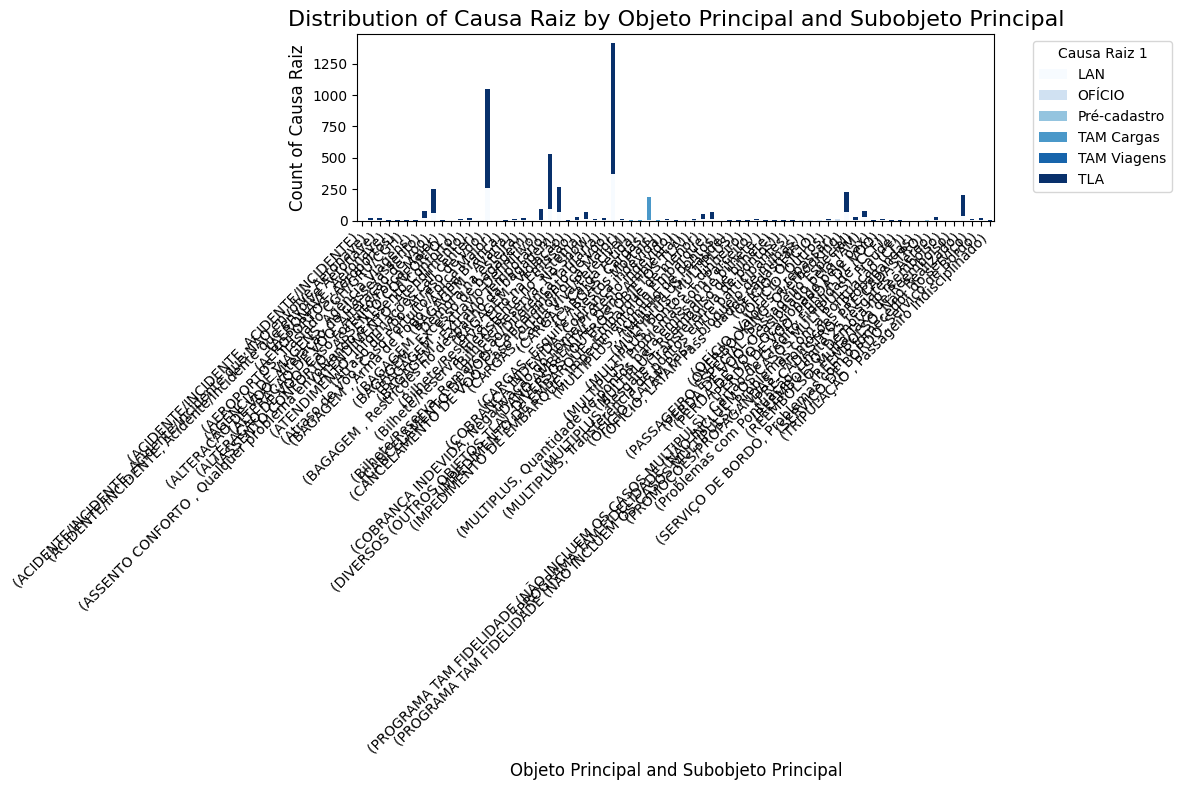

In [10]:
# Step 2: Group by 'Objeto Principal' and 'Subobjeto Principal' and count occurrences of 'Causa Raiz 1'
grouped_data = filtered_data.groupby(['Objeto Principal', 'Subobjeto Principal', 'Causa Raiz 1']).size().reset_index(name='Count')

# Step 3: Create a pivot table for visualization purposes
pivot_data = grouped_data.pivot_table(index=['Objeto Principal', 'Subobjeto Principal'], columns='Causa Raiz 1', values='Count', fill_value=0)

# Step 4: Plot the data
plt.figure(figsize=(12, 8))
pivot_data.plot(kind='bar', stacked=True, colormap='Blues', figsize=(12, 8))

# Customize the plot
plt.title('Distribution of Causa Raiz by Objeto Principal and Subobjeto Principal', fontsize=16)
plt.xlabel('Objeto Principal and Subobjeto Principal', fontsize=12)
plt.ylabel('Count of Causa Raiz', fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title='Causa Raiz 1', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

In [14]:
# Step 2: Calculate the count of each 'Causa Raiz 1' category
causa_raiz_counts = filtered_data['Causa Raiz 1'].value_counts().reset_index()
causa_raiz_counts.columns = ['Causa Raiz 1', 'Count']

# Step 3: Create an interactive bar chart using Plotly
fig = px.bar(
    causa_raiz_counts, 
    x='Count', 
    y='Causa Raiz 1', 
    orientation='h', 
    title='Interactive Distribution of Causa Raiz 1 Categories',
    labels={'Count': 'Number of Occurrences', 'Causa Raiz 1': 'Causa Raiz 1 Categories'},
    text='Count',  # Display the count on the bars
    color='Count',  # Color the bars based on the count
    color_continuous_scale='Blues'  # Set the color scale
)

# Step 4: Customize the layout for a more elegant look
fig.update_layout(
    title_font_size=20,
    xaxis_title='Number of Occurrences',
    yaxis_title='Causa Raiz 1 Categories',
    yaxis={'categoryorder':'total ascending'},  # Order the bars by count
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Transparent background
    xaxis_tickformat='d',  # Ensure integer format for x-axis
    hoverlabel=dict(font_size=12),  # Customize hover label size
)

# Show the interactive plot
fig.show()


In [17]:
filtered_data = df[(df['Area'] == 'Área 100') & (df['Data de Encerramento'].isna()) & (df['Causa Raiz 1'] == 'TLA')]

# Passo 2: Contar as ocorrências de cada categoria em 'Objeto Principal' (ou outra coluna se desejar)
category_counts = filtered_data['Objeto Principal'].value_counts().reset_index()
category_counts.columns = ['Categoria', 'Count']

# Passo 3: Calcular a porcentagem de cada categoria
total_count = category_counts['Count'].sum()
category_counts['Porcentagem'] = (category_counts['Count'] / total_count) * 100

# Passo 4: Criar gráfico de barras interativo com Plotly para mostrar porcentagem
fig = px.bar(
    category_counts, 
    x='Porcentagem', 
    y='Categoria', 
    orientation='h', 
    title="Distribuição Percentual das Categorias de Objeto Principal para Causa Raiz 'TLA'",
    labels={'Porcentagem': 'Porcentagem (%)', 'Categoria': 'Categorias'},
    text='Porcentagem',  # Exibir a porcentagem nos gráficos
    color='Porcentagem',  # Colorir as barras baseado na porcentagem
    color_continuous_scale='Viridis'  # Escolher escala de cores
)

# Passo 5: Personalizar o layout para um visual mais elegante
fig.update_layout(
    title_font_size=20,
    xaxis_title='Porcentagem (%)',
    yaxis_title='Categorias',
    yaxis={'categoryorder':'total ascending'},  # Ordenar barras pela contagem
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Fundo transparente
    hoverlabel=dict(font_size=12),  # Personalizar o tamanho do rótulo ao passar o mouse
)

# Exibir o gráfico interativo
fig.show()

In [18]:
filtered_data = df[(df['Area'] == 'Área 100') & (df['Data de Encerramento'].isna()) & (df['Causa Raiz 1'] == 'TLA')]

# Passo 2: Contar as ocorrências de cada categoria em 'Objeto Principal' (ou outra coluna se desejar)
category_counts = filtered_data['Causa Raiz 2'].value_counts().reset_index()
category_counts.columns = ['Categoria', 'Count']

# Passo 3: Calcular a porcentagem de cada categoria
total_count = category_counts['Count'].sum()
category_counts['Porcentagem'] = (category_counts['Count'] / total_count) * 100

# Passo 4: Criar gráfico de barras interativo com Plotly para mostrar porcentagem
fig = px.bar(
    category_counts, 
    x='Porcentagem', 
    y='Categoria', 
    orientation='h', 
    title="Distribuição Percentual das Categorias de Causa Raiz 2 para Causa Raiz 'TLA'",
    labels={'Porcentagem': 'Porcentagem (%)', 'Categoria': 'Categorias'},
    text='Porcentagem',  # Exibir a porcentagem nos gráficos
    color='Porcentagem',  # Colorir as barras baseado na porcentagem
    color_continuous_scale='Viridis'  # Escolher escala de cores
)

# Passo 5: Personalizar o layout para um visual mais elegante
fig.update_layout(
    title_font_size=20,
    xaxis_title='Porcentagem (%)',
    yaxis_title='Categorias',
    yaxis={'categoryorder':'total ascending'},  # Ordenar barras pela contagem
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Fundo transparente
    hoverlabel=dict(font_size=12),  # Personalizar o tamanho do rótulo ao passar o mouse
)

# Exibir o gráfico interativo
fig.show()

In [19]:
filtered_data = df[(df['Area'] == 'Área 100') & (df['Data de Encerramento'].isna()) & (df['Causa Raiz 1'] == 'TLA')]

# Passo 2: Contar as ocorrências de cada categoria em 'Objeto Principal' (ou outra coluna se desejar)
category_counts = filtered_data['Causa Raiz 3'].value_counts().reset_index()
category_counts.columns = ['Categoria', 'Count']

# Passo 3: Calcular a porcentagem de cada categoria
total_count = category_counts['Count'].sum()
category_counts['Porcentagem'] = (category_counts['Count'] / total_count) * 100

# Passo 4: Criar gráfico de barras interativo com Plotly para mostrar porcentagem
fig = px.bar(
    category_counts, 
    x='Porcentagem', 
    y='Categoria', 
    orientation='h', 
    title="Distribuição Percentual das Categorias de Causa Raiz 3 para Causa Raiz 'TLA'",
    labels={'Porcentagem': 'Porcentagem (%)', 'Categoria': 'Categorias'},
    text='Porcentagem',  # Exibir a porcentagem nos gráficos
    color='Porcentagem',  # Colorir as barras baseado na porcentagem
    color_continuous_scale='Viridis'  # Escolher escala de cores
)

# Passo 5: Personalizar o layout para um visual mais elegante
fig.update_layout(
    title_font_size=20,
    xaxis_title='Porcentagem (%)',
    yaxis_title='Categorias',
    yaxis={'categoryorder':'total ascending'},  # Ordenar barras pela contagem
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Fundo transparente
    hoverlabel=dict(font_size=12),  # Personalizar o tamanho do rótulo ao passar o mouse
)

# Exibir o gráfico interativo
fig.show()

In [20]:
filtered_data = df[(df['Area'] == 'Área 100') & (df['Data de Encerramento'].isna()) & (df['Causa Raiz 1'] == 'TLA')]

# Passo 2: Contar as ocorrências de cada categoria em 'Objeto Principal' (ou outra coluna se desejar)
category_counts = filtered_data['Causa Raiz 4'].value_counts().reset_index()
category_counts.columns = ['Categoria', 'Count']

# Passo 3: Calcular a porcentagem de cada categoria
total_count = category_counts['Count'].sum()
category_counts['Porcentagem'] = (category_counts['Count'] / total_count) * 100

# Passo 4: Criar gráfico de barras interativo com Plotly para mostrar porcentagem
fig = px.bar(
    category_counts, 
    x='Porcentagem', 
    y='Categoria', 
    orientation='h', 
    title="Distribuição Percentual das Categorias de Causa Raiz 4 para Causa Raiz 'TLA'",
    labels={'Porcentagem': 'Porcentagem (%)', 'Categoria': 'Categorias'},
    text='Porcentagem',  # Exibir a porcentagem nos gráficos
    color='Porcentagem',  # Colorir as barras baseado na porcentagem
    color_continuous_scale='Viridis'  # Escolher escala de cores
)

# Passo 5: Personalizar o layout para um visual mais elegante
fig.update_layout(
    title_font_size=20,
    xaxis_title='Porcentagem (%)',
    yaxis_title='Categorias',
    yaxis={'categoryorder':'total ascending'},  # Ordenar barras pela contagem
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Fundo transparente
    hoverlabel=dict(font_size=12),  # Personalizar o tamanho do rótulo ao passar o mouse
)

# Exibir o gráfico interativo
fig.show()

In [21]:
filtered_data = df[(df['Area'] == 'Área 100') & (df['Data de Encerramento'].isna()) & (df['Causa Raiz 1'] == 'TLA')]

# Passo 2: Contar as ocorrências de cada categoria em 'Objeto Principal' (ou outra coluna se desejar)
category_counts = filtered_data['Causa Raiz 5'].value_counts().reset_index()
category_counts.columns = ['Categoria', 'Count']

# Passo 3: Calcular a porcentagem de cada categoria
total_count = category_counts['Count'].sum()
category_counts['Porcentagem'] = (category_counts['Count'] / total_count) * 100

# Passo 4: Criar gráfico de barras interativo com Plotly para mostrar porcentagem
fig = px.bar(
    category_counts, 
    x='Porcentagem', 
    y='Categoria', 
    orientation='h', 
    title="Distribuição Percentual das Categorias de Causa Raiz 5 para Causa Raiz 'TLA'",
    labels={'Porcentagem': 'Porcentagem (%)', 'Categoria': 'Categorias'},
    text='Porcentagem',  # Exibir a porcentagem nos gráficos
    color='Porcentagem',  # Colorir as barras baseado na porcentagem
    color_continuous_scale='Viridis'  # Escolher escala de cores
)

# Passo 5: Personalizar o layout para um visual mais elegante
fig.update_layout(
    title_font_size=20,
    xaxis_title='Porcentagem (%)',
    yaxis_title='Categorias',
    yaxis={'categoryorder':'total ascending'},  # Ordenar barras pela contagem
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Fundo transparente
    hoverlabel=dict(font_size=12),  # Personalizar o tamanho do rótulo ao passar o mouse
)

# Exibir o gráfico interativo
fig.show()

# Próximo passos
#### Construção uma lista de categorias de Objeto Principal coerentes as Causas Raizes.
#### Repetir o processo para avaliação de objetos não principais, pois a CAUSA RAIZ pode estar em um objeto não principal.

#### Executar o mesmo procedimento para as outras causas Raizes (LAN, TAM CARGAS, OFÍCIO, Pré Cadastro)

#### Construir um roadmap com automação. ( Perfil ADM >> caixa de entrada >>)
#### Pergunta: Fiz isso para os casos ativos, é necessário fazer para os casos encerrados? 

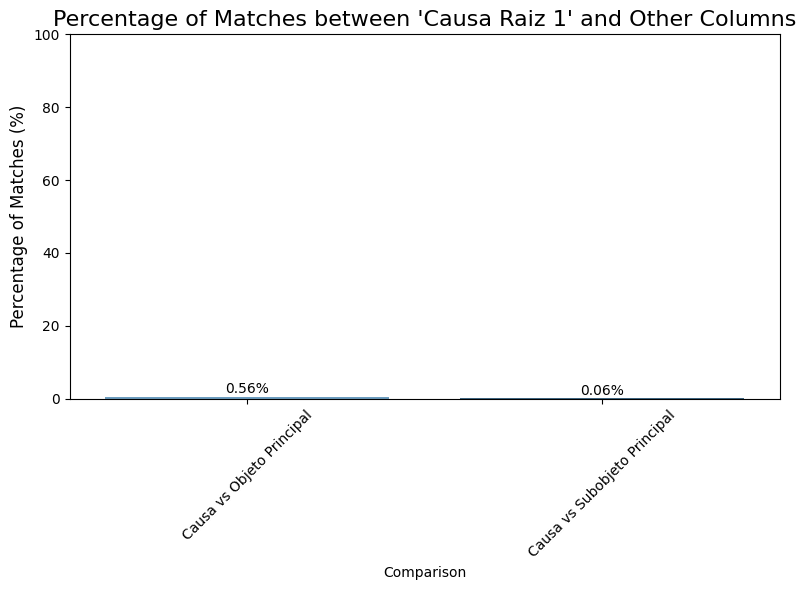

In [9]:
# Step 3: Calculate the percentage of matches
total_rows = len(final_data)
objeto_match_percentage = (final_data['causa_objeto_match'].sum() / total_rows) * 100
subobjeto_match_percentage = (final_data['causa_subobjeto_match'].sum() / total_rows) * 100

# Create a DataFrame for plotting
stats_df = pd.DataFrame({
    'Comparison': ['Causa vs Objeto Principal', 'Causa vs Subobjeto Principal'],
    'Percentage': [objeto_match_percentage, subobjeto_match_percentage]
})

# Step 4: Plot the percentages
plt.figure(figsize=(8, 6))
sns.barplot(x='Comparison', y='Percentage', data=stats_df, palette='Blues_d')

# Add percentages as text annotations on the bars
for index, row in stats_df.iterrows():
    plt.text(index, row['Percentage'] + 1, f"{row['Percentage']:.2f}%", color='black', ha="center")

# Add titles and labels for clarity
plt.title("Percentage of Matches between 'Causa Raiz 1' and Other Columns", fontsize=16)
plt.ylabel("Percentage of Matches (%)", fontsize=12)
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Calculate additional statistics
objeto_match_count = final_data['causa_objeto_match'].sum()
subobjeto_match_count = final_data['causa_subobjeto_match'].sum()

print(f"Matches between 'Causa Raiz 1' and 'Objeto Principal': {objeto_match_count}/{total_rows} ({objeto_match_percentage:.2f}%)")
print(f"Matches between 'Causa Raiz 1' and 'Subobjeto Principal': {subobjeto_match_count}/{total_rows} ({subobjeto_match_percentage:.2f}%)")